# Deep Learning Project2

## Introduction

**CONTEXT**: A Recognising multi-digit numbers in photographs captured at street level is an important component of modern-day map
making. A classic example of a corpus of such street-level photographs is Google’s Street View imagery composed of hundreds of millions
of geo-located 360-degree panoramic images.

The ability to automatically transcribe an address number from a geo-located patch of pixels and associate the transcribed number with a
known street address helps pinpoint, with a high degree of accuracy, the location of the building it represents. More broadly, recognising
numbers in photographs is a problem of interest to the optical character recognition community.

While OCR on constrained domains like document processing is well studied, arbitrary multi-character text recognition in photographs is
still highly challenging. This difficulty arises due to the wide variability in the visual appearance of text in the wild on account of a large
range of fonts, colours, styles, orientations, and character arrangements.

The recognition problem is further complicated by environmental factors such as lighting, shadows, specularity, and occlusions as well as
by image acquisition factors such as resolution, motion, and focus blurs. In this project, we will use the dataset with images centred around
a single digit (many of the images do contain some distractors at the sides). Although we are taking a sample of the data which is simpler,
it is more complex than MNIST because of the distractors.

**DATA DESCRIPTION**: The SVHN is a real-world image dataset for developing machine learning and object recognition algorithms with the
minimal requirement on data formatting but comes from a significantly harder, unsolved, real-world problem (recognising digits and
numbers in natural scene images). SVHN is obtained from house numbers in Google Street View images.
Where the labels for each of this image are the prominent number in that image i.e. 2,6,7 and 4 respectively.
The dataset has been provided in the form of h5py files. You can read about this file format here: https://docs.h5py.org/en/stable/

Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn import model_selection
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import warnings
from sklearn.model_selection import KFold
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout,BatchNormalization, Activation, LeakyReLU
from keras.utils import to_categorical
from keras import optimizers
import random
from tensorflow.keras import backend


## Load the dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import h5py
hf = h5py.File('/content/drive/MyDrive/Colab Notebooks/PGP AIML/Deep Learning/Autonomous_Vehicles_SVHN_single_grey1.h5', 'r')

In [4]:
hf.keys()

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

## Data Analysis and Preprocessing

Split the data into X_train, X_test, Y_train, Y_test

In [5]:
X_train_im = hf['X_train'][:]
X_test_im = hf['X_test'][:]
y_train_im = hf['y_train'][:]
y_test_im = hf['y_test'][:]

In [6]:
X_train_im[0]

array([[ 33.0704,  30.2601,  26.852 , ...,  71.4471,  58.2204,  42.9939],
       [ 25.2283,  25.5533,  29.9765, ..., 113.0209, 103.3639,  84.2949],
       [ 26.2775,  22.6137,  40.4763, ..., 113.3028, 121.775 , 115.4228],
       ...,
       [ 28.5502,  36.212 ,  45.0801, ...,  24.1359,  25.0927,  26.0603],
       [ 38.4352,  26.4733,  23.2717, ...,  28.1094,  29.4683,  30.0661],
       [ 50.2984,  26.0773,  24.0389, ...,  49.6682,  50.853 ,  53.0377]],
      dtype=float32)

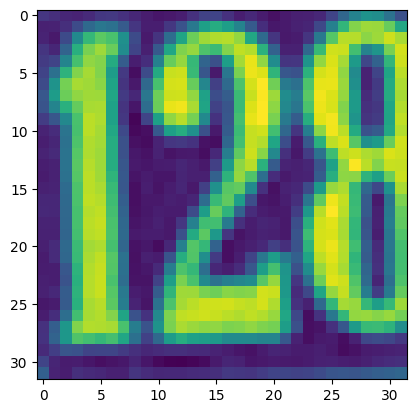

In [7]:
plt.imshow(X_train_im[0])

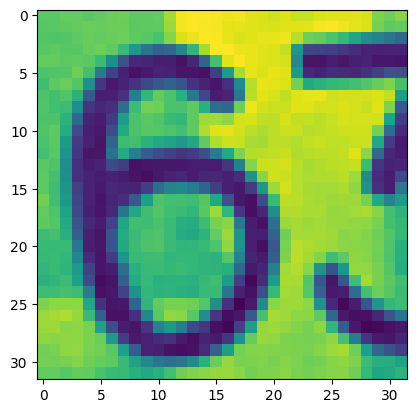

In [8]:
plt.imshow(X_train_im[1])

In [9]:
print('Shape of X train: ' + str(X_train_im.shape))
print('Shape of X test: ' + str(X_test_im.shape))
print('Shape of y train: ' + str(y_train_im.shape))
print('Shape of y test: ' + str(y_test_im.shape))


Shape of X train: (42000, 32, 32)
Shape of X test: (18000, 32, 32)
Shape of y train: (42000,)
Shape of y test: (18000,)


Visualise first 10 images in train data and print its corresponding labels

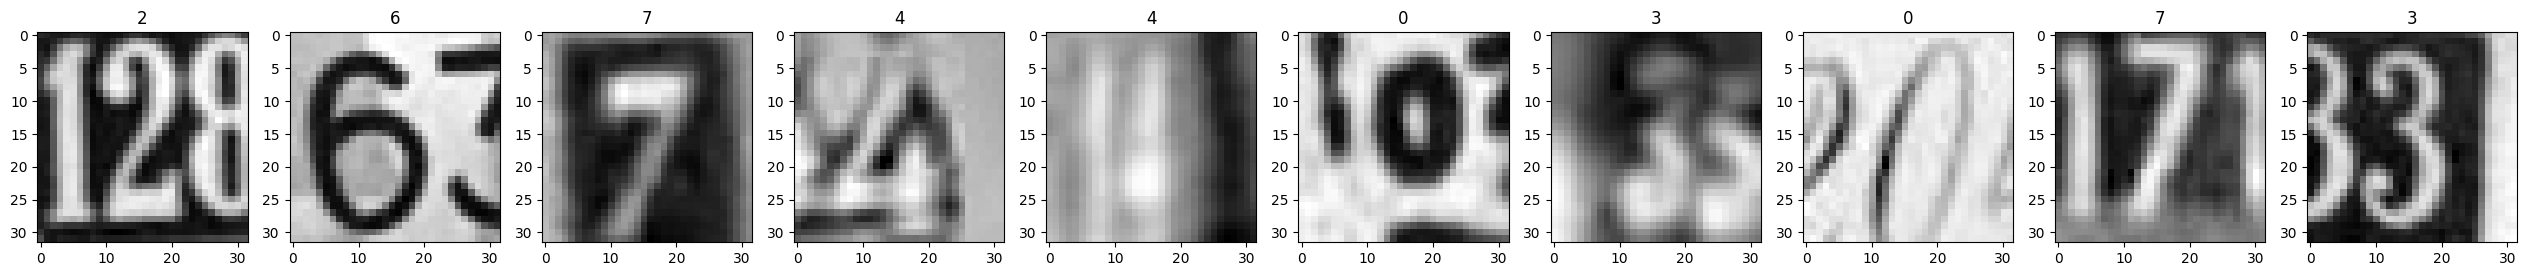

In [10]:
fig, axes = plt.subplots(1,10, figsize=(32,32))
for i,ax in enumerate(axes.flat):
  #print label in the title
  ax.title.set_text(y_train_im[i])
  ax.imshow(X_train_im[i],cmap='gray')


Reshape all the images with appropriate shape

In [11]:
X_train_im = X_train_im.reshape(X_train_im.shape[0], 32*32, 1)
X_test_im = X_test_im.reshape(X_test_im.shape[0], 32*32, 1)

Normalise the pixel values

In [12]:
X_train_im = X_train_im/255
X_test_im = X_test_im/255

In [13]:
X_train_im.shape

(42000, 1024, 1)

In [14]:
X_test_im.shape

(18000, 1024, 1)

Transform the target label

In [15]:
y_train_im = to_categorical(y_train_im)
y_test_im = to_categorical(y_test_im)


In [16]:
y_train_im.shape

(42000, 10)

In [17]:
y_train_im.shape[1]

10

In [18]:
y_test_im.shape[1]

10

## Model Training and Evaluation

In [19]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [20]:
immodel = Sequential()
immodel.add(Dense(256, input_dim = X_train_im.shape[1], kernel_initializer='he_normal', activation = 'relu'))

immodel.add(Dense(128,  kernel_initializer='he_normal', activation = 'relu'))

immodel.add(Dense(64, kernel_initializer='he_normal', activation = 'relu'))

immodel.add(Dense(32, kernel_initializer='he_normal', activation = 'relu'))

immodel.add(Dense(y_train_im.shape[1], kernel_initializer='he_normal', activation = 'softmax'))


In [21]:
optimrms = optimizers.RMSprop(lr = 0.001)

In [22]:
immodel.compile(optimizer=optimrms, loss='categorical_crossentropy', metrics=['accuracy'])
immodel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               262400    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 10)                330       
                                                                 
Total params: 305962 (1.17 MB)
Trainable params: 305962 (1.17 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Train the classifier using previously designed Architecture

In [23]:
imhistory=immodel.fit(X_train_im, y_train_im,
          validation_split=0.2,
          epochs=25,
          batch_size=200,verbose=1)

Epoch 1/25
168/168 [==============================] - 8s 37ms/step - loss: 2.3206 - accuracy: 0.1018 - val_loss: 2.2959 - val_accuracy: 0.1011
Epoch 2/25
168/168 [==============================] - 4s 23ms/step - loss: 2.2573 - accuracy: 0.1451 - val_loss: 2.2130 - val_accuracy: 0.1679
Epoch 3/25
168/168 [==============================] - 4s 25ms/step - loss: 2.0073 - accuracy: 0.2808 - val_loss: 1.8823 - val_accuracy: 0.3212
Epoch 4/25
168/168 [==============================] - 2s 15ms/step - loss: 1.8009 - accuracy: 0.3688 - val_loss: 1.6212 - val_accuracy: 0.4243
Epoch 5/25
168/168 [==============================] - 3s 20ms/step - loss: 1.6589 - accuracy: 0.4260 - val_loss: 1.5956 - val_accuracy: 0.4330
Epoch 6/25
168/168 [==============================] - 2s 13ms/step - loss: 1.5471 - accuracy: 0.4697 - val_loss: 1.8153 - val_accuracy: 0.3954
Epoch 7/25
168/168 [==============================] - 2s 13ms/step - loss: 1.4541 - accuracy: 0.5120 - val_loss: 1.6162 - val_accuracy: 0.4245

Evaluate performance of the model

In [24]:
y_pred_im = immodel.predict(X_test_im)
y_pred_im

563/563 [==============================] - 2s 3ms/step


array([[1.04556546e-01, 1.71727370e-02, 1.08587079e-01, ...,
        5.24583273e-02, 1.40677080e-01, 4.05981600e-01],
       [9.67489427e-07, 2.92476849e-04, 8.19724619e-01, ...,
        1.77728161e-01, 3.85807187e-04, 1.05226363e-05],
       [1.34252463e-04, 7.45123951e-04, 9.78285730e-01, ...,
        8.57703970e-04, 1.17258886e-02, 3.72757111e-03],
       ...,
       [4.53749744e-05, 1.52299087e-03, 9.09667462e-04, ...,
        9.95802581e-01, 1.09889843e-04, 8.07809760e-04],
       [2.17105076e-03, 1.19880286e-04, 5.03023155e-04, ...,
        7.99859175e-04, 4.10434119e-02, 9.38805401e-01],
       [7.61925694e-05, 7.55297393e-03, 9.68843043e-01, ...,
        7.68116256e-03, 1.75074453e-03, 9.57190350e-05]], dtype=float32)

In [25]:
y_test_imdf = pd.DataFrame(y_test_im,columns=range(0,10)).idxmax(axis = 1)
y_test_imdf

0        1
1        7
2        2
3        9
4        0
        ..
17995    9
17996    1
17997    7
17998    9
17999    2
Length: 18000, dtype: int64

In [26]:
y_pred_df = pd.DataFrame(y_pred_im,columns = range(0,10))

In [27]:
y_pred = y_pred_df.idxmax(axis=1)

<Axes: >

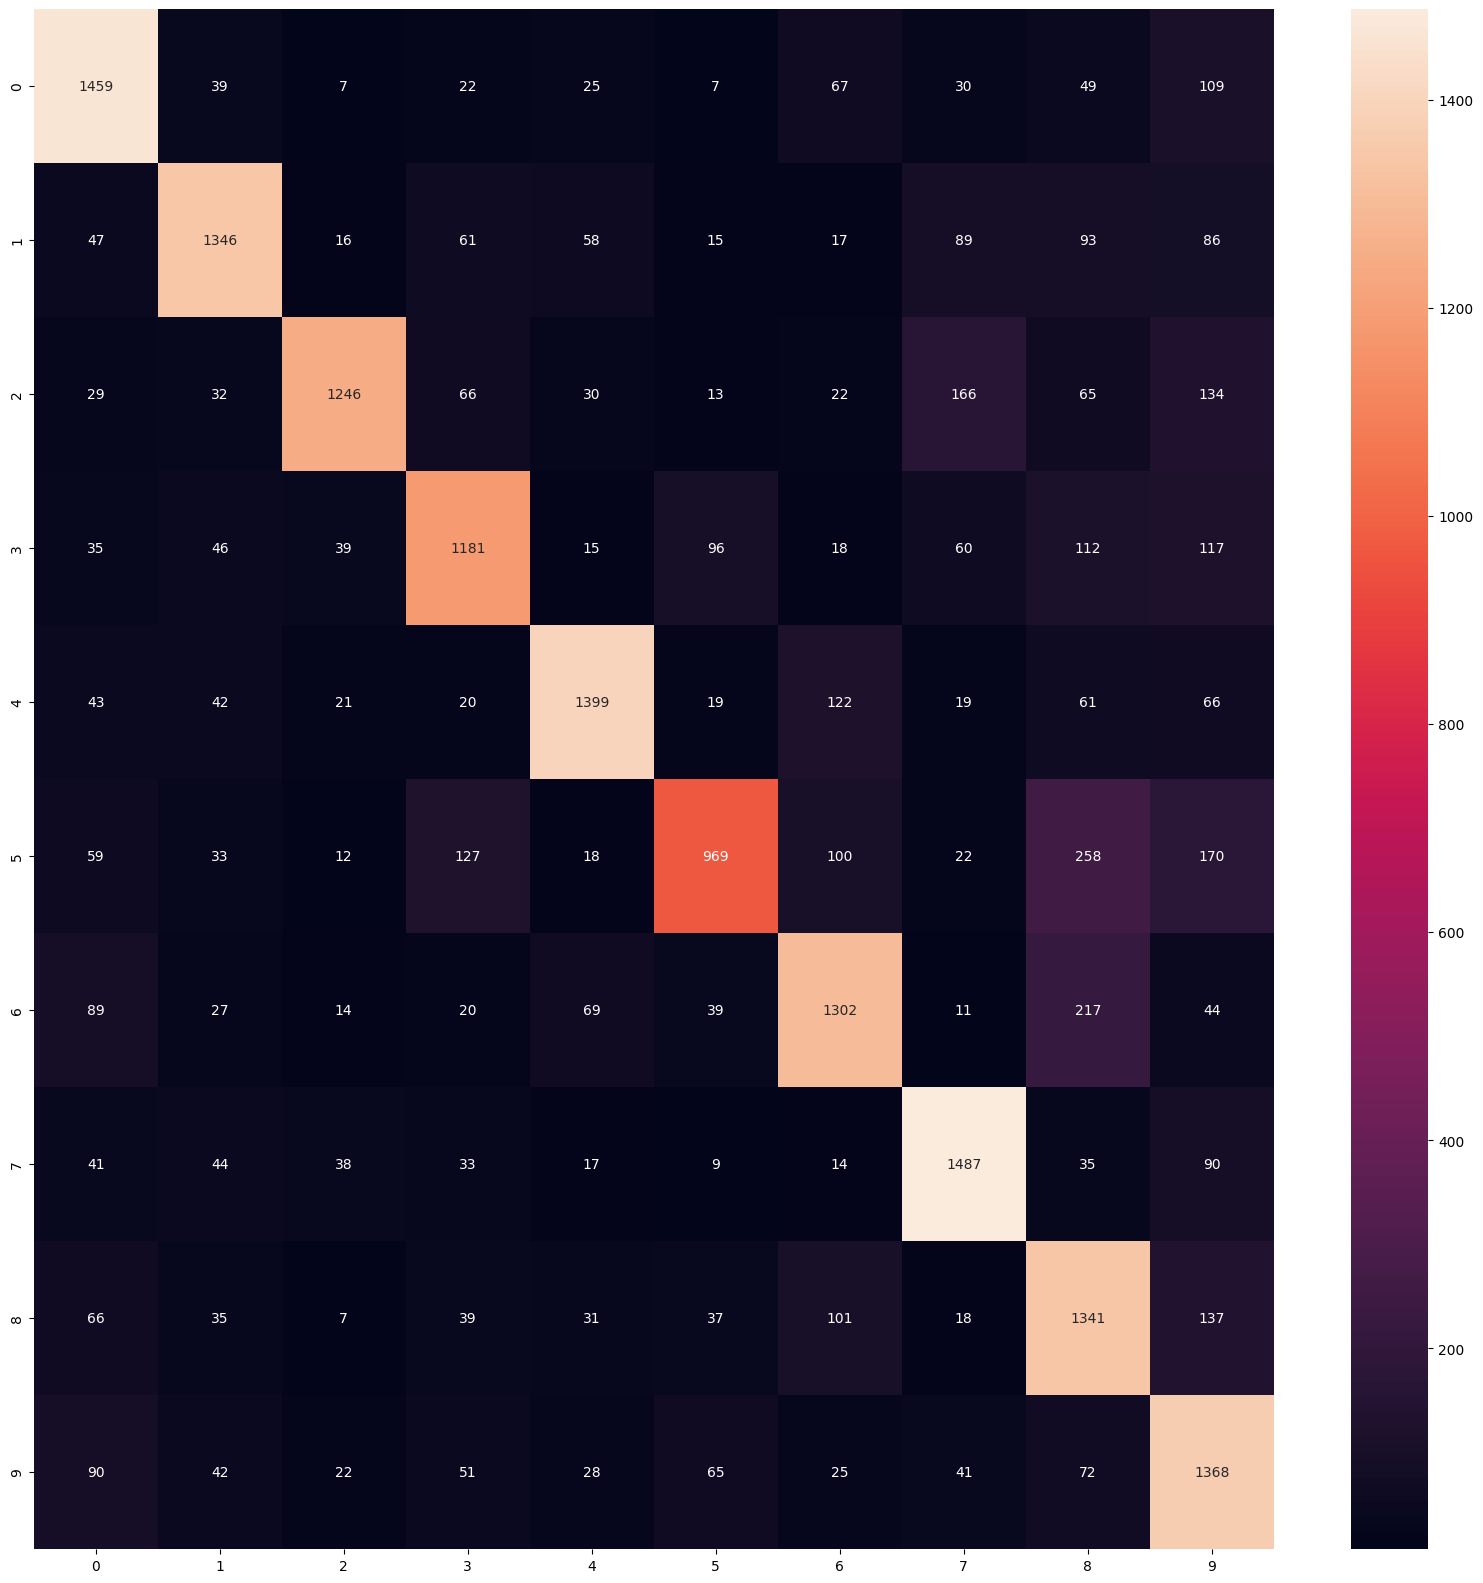

In [28]:
from sklearn import metrics
from sklearn.metrics import classification_report

cm=metrics.confusion_matrix(y_test_imdf, y_pred, labels=range(0,10))

df_cm = pd.DataFrame(cm, index = [i for i in ["0","1","2","3","4","5","6","7","8","9"]],
                  columns = [i for i in ["0","1","2","3","4","5","6","7","8","9"]])
plt.figure(figsize = (20,20))
sns.heatmap(df_cm, annot=True, fmt='g')

In [29]:
cr=metrics.classification_report(y_test_imdf,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.75      0.80      0.77      1814
           1       0.80      0.74      0.77      1828
           2       0.88      0.69      0.77      1803
           3       0.73      0.69      0.71      1719
           4       0.83      0.77      0.80      1812
           5       0.76      0.55      0.64      1768
           6       0.73      0.71      0.72      1832
           7       0.77      0.82      0.79      1808
           8       0.58      0.74      0.65      1812
           9       0.59      0.76      0.66      1804

    accuracy                           0.73     18000
   macro avg       0.74      0.73      0.73     18000
weighted avg       0.74      0.73      0.73     18000



In [30]:
immodel.evaluate(X_train_im, y_train_im)

1313/1313 [==============================] - 5s 3ms/step - loss: 0.8013 - accuracy: 0.7447


[0.8013407588005066, 0.7446666955947876]

In [31]:
resultsim = immodel.evaluate(X_test_im, y_test_im)
resultsim

563/563 [==============================] - 2s 3ms/step - loss: 0.8728 - accuracy: 0.7277


[0.8727512955665588, 0.7276666760444641]

The model has reasonably good Precision, Recall and F1score for all the target labels. The accuracy on the training set is 74.4% while that on the test set is 72.8%. So, the model is adequately fitting the data.

Plot the training loss, validation loss vs number of epochs and training accuracy, validation accuracy vs number of epochs plot

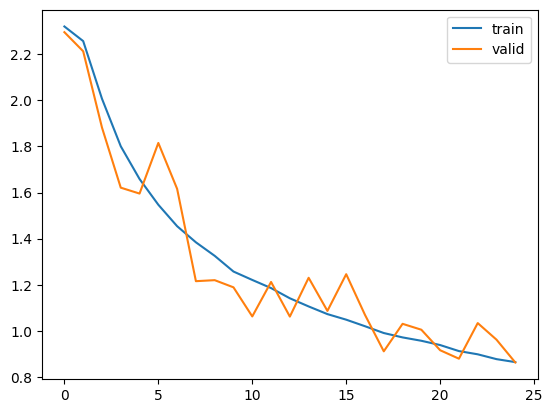

In [34]:
# Capturing learning history per epoch
imhist  = pd.DataFrame(imhistory.history)
imhist['epoch'] = imhistory.epoch

# Plotting accuracy at different epochs
plt.plot(imhist['loss'])
plt.plot(imhist['val_loss'])
plt.legend(("train" , "valid") , loc =0)


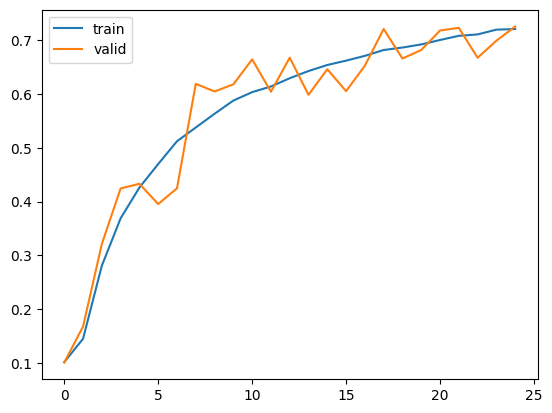

In [35]:
# Capturing learning history per epoch
imhist  = pd.DataFrame(imhistory.history)
imhist['epoch'] = imhistory.epoch

# Plotting accuracy at different epochs
plt.plot(imhist['accuracy'])
plt.plot(imhist['val_accuracy'])
plt.legend(("train" , "valid") , loc =0)


The losses on the training and validation sets have converged well leading to similar accuracies on the training and validations sets. So, the model is adequately fitting the data. Similarly, accuracies between training and test sets are also quite close 74% and 73%.